# Unit 4 Project
After understanding how neural networks work, implementing some basic architectures using deep learning frameworks, and learning about some advanced techniques to help enhance our neural networks' models results, it's time to apply what you learned! So let's start

## Project Overview 
In this project, you will build a neural network model to classify images from CIFAR 10 dataset. 

The CIFAR-10 dataset consists of 60000 32x32 color images of 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. [source](https://www.cs.toronto.edu/~kriz/cifar.html)

Unlike the previous projects, there will be no code cells to fill, the only task you have is to build the best possible model using the techniques you learned about in this unit. But we will guide you with some directives.

You will have enough guidance throughout the project and your work will be reviewed and graded by a teacher assistant. You can also reach out to the TA via slack whenever you feel you are stuck.

## Some guidelines
- Please use text cells to write the questions' answers in a good way.
- Don't forget to save the different models you tested so you will be able to report the different results you got and the impact of the different techniques you tested later.

## Getting started
- In case you don't have a GPU, it is recommended that you use google colab. Start by cloning this repository, then open [google colab](https://colab.research.google.com/), click on File > Upload notebook, and finally upload the ```.ipynb``` file from the repository you have just cloned! Don't forget to change the runtime to GPU. If you want to work in your local environment just open it using jupyter notebook.



## Dataset 

1.   Load the dataset (**hint**: it's available here https://keras.io/api/datasets/)
2.   Display few images of each class.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.losses import SparseCategoricalCrossentropy
from keras.regularizers import L1, L2, L1L2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# For data augmentation
from keras.layers import Rescaling, RandomFlip, RandomRotation
from keras.layers import RandomContrast, RandomZoom

In [3]:
# Your code here

# Load the dataset
(x_train, y_train), (x_test, y_test)= load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
def display_images(images,labels):
  fig = plt.figure(figsize=(18,15))

  labels_dict = {
    0: "airplane",
    1 :"automobile",
    2 :	"bird",
    3 :	"cat",
    4 :	"deer",
    5 :	"dog",
    6 :	"frog",
    7 :	"horse",
    8 :	"ship",
    9 :	"truck"
}
  def get_image_indices(labels,labels_dict):
    indices = []
    for label in labels_dict.keys():
      all_indices = np.where(y_train == label)
      indices.extend(all_indices[0][:2])
    return indices
  indices = get_image_indices(labels,labels_dict)
  for i in range(20):
    fig.add_subplot(4,5,i+1)

    plt.imshow(images[indices[i]])
    plt.title(labels_dict[labels[indices[i],0]])
    plt.axis("off")

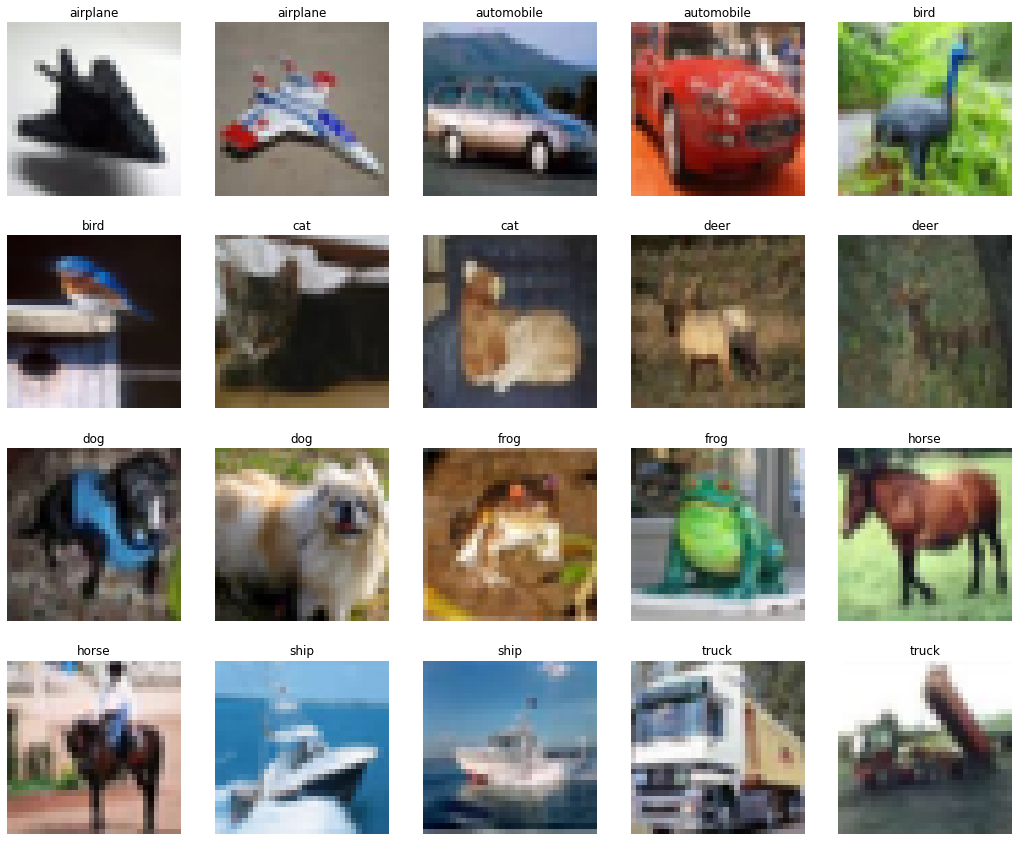

In [ ]:
# Display few images of each class
display_images(x_train,y_train)

## Baseline Model

1.   Build a basline model using only dense layers, activation function of your choice, and the adapted cost function for this problem.
2.   Train and evaluate your model
3.   Analyze the result



In [4]:
def create_model(optimizer=Adam(),basic=False,BN_before=True,dropout_rate=0.3,nb_layers=3,nb_neurones=[132,100,10],activation_functions=['relu','relu','softmax'],
                 weight_initializations=["he_normal","he_normal","he_normal"],regularizer=None, data_augmentation=None):
  
  assert nb_layers == len(nb_neurones),f'You should provide number of neurones for {nb_layers}, you provided for {len(nb_neurones)} layers'
  assert nb_layers == len(activation_functions),f'You should provide activation functions for each layer, you provided only for {len(activation_functions)} layers'
  assert nb_layers == len(weight_initializations),f'You should provide initialization method for each layer, you provided only for {len(weight_initializations)} layers'

  if basic :
    model = Sequential([
                      Flatten(input_shape=(32, 32,3)) ])
    for layer in range(nb_layers):
      model.add(Dense(nb_neurones[layer],
                        activation= activation_functions[layer],
                        kernel_initializer=weight_initializations[layer]
                        )
      )
  else:
    model = Sequential()
    if data_augmentation != None :
      model.add(data_augmentation)
    model.add(Flatten(input_shape=(32, 32,3)))

    for layer in range(nb_layers):
      if activation_functions[layer] == "lrelu":
        if BN_before:
          model.add(BatchNormalization())
        model.add(Dropout(rate=dropout_rate))
        model.add(Dense(nb_neurones[layer],
                        activation=LeakyReLU(),
                        kernel_initializer=weight_initializations[layer],
                        kernel_regularizer=regularizer
                        )
        )
        if not BN_before:
          model.add(BatchNormalization())
      else:
        if BN_before:
          model.add(BatchNormalization())
        model.add(Dropout(rate=dropout_rate))
        model.add(Dense(nb_neurones[layer],
                        activation=activation_functions[layer],
                        kernel_initializer=weight_initializations[layer],
                        kernel_regularizer=regularizer)
        )
        if not BN_before:
          model.add(BatchNormalization())
  model.compile(optimizer=optimizer,
                loss=SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

In [ ]:
# Your code here
model = create_model(basic=True)
model.fit(x_train,y_train,epochs=20)
model.save('./my_models/basic_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 6s 4ms/step - loss: 17.5404 - accuracy: 0.1974
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4122 - accuracy: 0.2413
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1740 - accuracy: 0.2558
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2127 - accuracy: 0.2400
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3700 - accuracy: 0.1009
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3030 - accuracy: 0.0983
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0983
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3029 - accuracy: 0.0995
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0985
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accura

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 2.3042 - accuracy: 0.1000 - 905ms/epoch - 3ms/step

Test accuracy: 0.10000000149011612


**Analysis :**
As we can see the loss started decreasing at a certain point then it stagnned in the same value 2.3030. The accuracy however was decreasing instead of increasing.

## Accelerating the training

1.   Add batch normalization layers to your network in order to accelerate the training. Start with adding batch norm layer before each of your activation layers.
2.   Analyze the new results
3.   Change the position of the batch norm layers so they will be after the activation layers. Compare the results.
   



In [ ]:
# Your code here
model = create_model(BN_before=True)
model.fit(x_train,y_train,epochs=20)
model.save('./my_models/basic+BN_before_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 12s 6ms/step - loss: 1.9349 - accuracy: 0.3237
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6928 - accuracy: 0.3951
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6326 - accuracy: 0.4176
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5932 - accuracy: 0.4328
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5604 - accuracy: 0.4433
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5374 - accuracy: 0.4525
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5207 - accuracy: 0.4579
Epoch 8/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5039 - accuracy: 0.4622
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4831 - accuracy: 0.4702
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4770 

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 1.2818 - accuracy: 0.5438 - 1s/epoch - 3ms/step

Test accuracy: 0.5437999963760376


**Analysis :**
After adding batch normalization before each Dense layer, the accuracy improved significantly from 0.32 to 0.5 during training.

The Accuracy in validation data also improved to reach 0.54. Despite this improvement, the value of accuracy is still low.

### Changing the position of BatchNormalization

In [ ]:
# Your code here
model = create_model(BN_before=False)
model.fit(x_train,y_train,epochs=20)
model.save('./my_models/basic+BN_after_model')

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1314 - accuracy: 0.2839
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9809 - accuracy: 0.3197
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9114 - accuracy: 0.3324
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8733 - accuracy: 0.3372
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8496 - accuracy: 0.3467
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8200 - accuracy: 0.3545
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8108 - accuracy: 0.3574
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7974 - accuracy: 0.3606
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7877 - accuracy: 0.3651
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - l

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.5565 - accuracy: 0.4545 - 1s/epoch - 3ms/step

Test accuracy: 0.4544999897480011


**Analysis**

As we can see adding the BatchNormalization Layer after each Dense layer, doesn't give as much good result as adding it before each dense layer (0.45 < 0.54).

## Reducing the overfitting 


1.   Apply the dropout technique to reduce the overfitting your model is suffering from
2.   Try different dropout rates 



In [ ]:
# Your code here
model = create_model(dropout_rate=0.2)
model.fit(x_train,y_train,epochs=20)

model.save('./my_models/dropout_model_rate_0.2')
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 11s 6ms/step - loss: 1.8552 - accuracy: 0.3479
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6396 - accuracy: 0.4158
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5678 - accuracy: 0.4404
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5223 - accuracy: 0.4589
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4881 - accuracy: 0.4692
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4613 - accuracy: 0.4796
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4380 - accuracy: 0.4881
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4195 - accuracy: 0.4948
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4028 - accuracy: 0.5009
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3876 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 1.2473 - accuracy: 0.5574 - 1s/epoch - 3ms/step

Test accuracy: 0.5573999881744385


**Analysis :**

The accuracy in the test set is better than the accuracy during training (0.55 > 0.54) which proves that the overfitting has been reduced.

In [ ]:
# rate = 0.4
model = create_model(dropout_rate=0.4)
model.fit(x_train,y_train,epochs=20)

model.save('./my_models/dropout_model_drate_0.4')
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 11s 6ms/step - loss: 2.0125 - accuracy: 0.3005
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7421 - accuracy: 0.3751
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6894 - accuracy: 0.3988
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6500 - accuracy: 0.4120
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6286 - accuracy: 0.4180
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6062 - accuracy: 0.4253
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5879 - accuracy: 0.4356
Epoch 8/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5711 - accuracy: 0.4407
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5605 - accuracy: 0.4468
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5529 - acc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 1.3287 - accuracy: 0.5311 - 1s/epoch - 3ms/step

Test accuracy: 0.5310999751091003


**Analysis :**

Increasing the rate of the Dropout layer, caused the accuracy to decrease during the trainign and in the test set, compared to the first one. But still the test accuracy is better than the training accuracy (0.53 > 0.47)

In [ ]:
# rate = 0.3
model = create_model(dropout_rate=0.3)
model.fit(x_train,y_train,epochs=20)
model.save('./my_models/dropout_model_rate_0.3')
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 11s 6ms/step - loss: 1.9320 - accuracy: 0.3223
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6900 - accuracy: 0.3947
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6278 - accuracy: 0.4215
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5898 - accuracy: 0.4316
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5549 - accuracy: 0.4471
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5369 - accuracy: 0.4517
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5181 - accuracy: 0.4578
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4996 - accuracy: 0.4667
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4935 - accuracy: 0.4670
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4726

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 1.2823 - accuracy: 0.5430 - 1s/epoch - 3ms/step

Test accuracy: 0.5429999828338623


**Analysis :**

Decreasing the rate to 0.3, gave better results in the test set: 0.54 compared to 0.53 of accuracy with rate  0.4.

However the difference between the accuracy in training and test is bigger with rate 0.4 : 0.53 - 0.47 =0.06 

with rate 0.3 : 0.54 - 0.5 = 0.04

with rate 0.2 : 0.55 - 0.53 = 0.02

Therefore the best rate is 0.4

## Trying different model's parameters
1. Try changing the number of layers, the number of hidden neurons in each layer, the activation functions, the weight initialization method...
2. Compare the results you got for each evaluated model.

### Changing the number of Layers

In [ ]:
# Your code here
model = create_model(dropout_rate=0.4,
                     nb_layers=5,nb_neurones=[512,264,132,128,10],
                     activation_functions=["elu","relu","elu","relu","softmax"],
                     weight_initializations=["lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform"])
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_elu_relu_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 12s 6ms/step - loss: 1.9481 - accuracy: 0.3070
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7270 - accuracy: 0.3826
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6645 - accuracy: 0.4090
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6198 - accuracy: 0.4254
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5836 - accuracy: 0.4408
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5600 - accuracy: 0.4496
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5296 - accuracy: 0.4594
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5125 - accuracy: 0.4675
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4990 - accuracy: 0.4713
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4800 - accura

In [ ]:
model = create_model(dropout_rate=0.4,
                     nb_layers=5,nb_neurones=[512,264,132,128,10],
                     activation_functions=["relu","relu","relu","relu","softmax"],
                     weight_initializations=["lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform"])
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_relu_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 10s 6ms/step - loss: 1.9838 - accuracy: 0.2884
Epoch 2/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7483 - accuracy: 0.3747
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6789 - accuracy: 0.4028
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6331 - accuracy: 0.4202
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6032 - accuracy: 0.4323
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5651 - accuracy: 0.4455
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5483 - accuracy: 0.4541
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5222 - accuracy: 0.4640
Epoch 9/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5060 - accuracy: 0.4705
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4940 - accura

In [ ]:
model = create_model(dropout_rate=0.4,
                     nb_layers=5,nb_neurones=[512,264,132,128,10],
                     activation_functions=["elu","elu","elu","elu","softmax"],
                     weight_initializations=["lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform"])
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_elu_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 10s 6ms/step - loss: 1.9228 - accuracy: 0.3169
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7092 - accuracy: 0.3879
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6430 - accuracy: 0.4153
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5964 - accuracy: 0.4316
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5687 - accuracy: 0.4442
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5437 - accuracy: 0.4531
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5212 - accuracy: 0.4624
Epoch 8/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4991 - accuracy: 0.4712
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4786 - accuracy: 0.4789
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4671 - accura

**Analysis :**

Using elu activation function with Lecun initialization gave better results

In [ ]:
model = create_model(dropout_rate=0.4,
                     nb_layers=5,nb_neurones=[512,264,132,128,10],
                     activation_functions=["selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform","lecun_uniform"])
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_selu_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 10s 5ms/step - loss: 1.9284 - accuracy: 0.3120
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7145 - accuracy: 0.3879
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6478 - accuracy: 0.4154
Epoch 4/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6093 - accuracy: 0.4296
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5703 - accuracy: 0.4442
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5389 - accuracy: 0.4568
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5203 - accuracy: 0.4632
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4996 - accuracy: 0.4694
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4873 - accuracy: 0.4748
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4665 - accura

In [ ]:
# Changing the number of layers and number of epochs
model = create_model(dropout_rate=0.4,
                     nb_layers=7,nb_neurones=[512,464,312,264,132,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"])
model.fit(x_train,y_train,epochs=30)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_7layers_selu_lecun_normal_model')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 21s 10ms/step - loss: 1.9797 - accuracy: 0.2906
Epoch 2/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7554 - accuracy: 0.3712
Epoch 3/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6895 - accuracy: 0.3976
Epoch 4/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6444 - accuracy: 0.4182
Epoch 5/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6098 - accuracy: 0.4292
Epoch 6/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5841 - accuracy: 0.4425
Epoch 7/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5545 - accuracy: 0.4537
Epoch 8/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5320 - accuracy: 0.4601
Epoch 9/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5207 - accuracy: 0.4669
Epoch 10/30
1563/1563 [==============================] - 16s 10ms/step - lo

**Analysis :**

Increasing the number of layers and epochs didn't help improving the accuracy

In [ ]:
# Changing the number of layers and number of neurones
model = create_model(dropout_rate=0.4,
                     nb_layers=6,nb_neurones=[64,64,64,64,64,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"])
model.fit(x_train,y_train,epochs=30)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_6layers_selu_lecun_normal_model')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 17s 8ms/step - loss: 2.0764 - accuracy: 0.2382
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8917 - accuracy: 0.3090
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8499 - accuracy: 0.3259
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8214 - accuracy: 0.3421
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7967 - accuracy: 0.3531
Epoch 6/30
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7817 - accuracy: 0.3603
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7654 - accuracy: 0.3656
Epoch 8/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7546 - accuracy: 0.3725
Epoch 9/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7498 - accuracy: 0.3745
Epoch 10/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7407

In [ ]:
# Changing the number of layers and number of neurones
model = create_model(dropout_rate=0.4,
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["relu","relu","relu","relu","relu","softmax"],
                     weight_initializations=["he_normal","he_normal","he_normal","he_normal","he_normal","he_normal"])
model.fit(x_train,y_train,epochs=30)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training5_6layers2_selu_lecun_normal_model')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 16s 9ms/step - loss: 2.1890 - accuracy: 0.2402
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8276 - accuracy: 0.3388
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7480 - accuracy: 0.3742
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7005 - accuracy: 0.3928
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6616 - accuracy: 0.4102
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6276 - accuracy: 0.4246
Epoch 7/30
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6015 - accuracy: 0.4349
Epoch 8/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5783 - accuracy: 0.4440
Epoch 9/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5565 - accuracy: 0.4516
Epoch 10/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5408

**Analysis :**

Despite all the changes, the accuracy is still low.

We noticed that the accuracy was better when using ReLU alongside with He intialization function.

When increasing the number of layers, the accuracy didn't improve. In addition we noticed that using the same number of neurones in all layers gave us a bad accuracy, compared to the models where we used a different number of neurones in each layer.

Therefore untill now the best model is the one using 3 layers with relu activation functions, He initialization method, with BatchNormalization layers being used before each layer and using a rate= 0.4 for the Dropout Layer.

## Few more experiments to go

1.   **Exploring more regularization techniques:** Try at least 2 regularization techniques separately and combined.  A non-exhaustive list of regularization techniques you can test


> * L1 and L2 regularization
* Early stopping
* Data augmentation
* Decreasing the complexity of the model

2.   **Hyperparameters' tuning:** Try to tune the learning parameters using the tuning strategies we learned about:

> * Learning rate
* Mini-batch size
* The optimizer and its parameters

3. Analyze the impact of each of the applied techniques. What were the most effective ones? What were the hypeparameters that affects the results the most?


####1. Exploring Regularization techniques

In [ ]:
# Your code here
# L1
model = create_model(dropout_rate = 0.4,
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["relu","relu","relu","relu","relu","softmax"],
                     weight_initializations=["he_normal","he_normal","he_normal","he_normal","he_normal","he_normal"],
                     regularizer=L1(0.01)
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training6_L1_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 22s 11ms/step - loss: 34.6224 - accuracy: 0.1683
Epoch 2/20
1563/1563 [==============================] - 16s 11ms/step - loss: 7.0282 - accuracy: 0.1768
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 6.7047 - accuracy: 0.1634
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 6.4354 - accuracy: 0.1629
Epoch 5/20
1563/1563 [==============================] - 16s 11ms/step - loss: 6.1622 - accuracy: 0.1614
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 5.8900 - accuracy: 0.1675
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 5.5946 - accuracy: 0.1643
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 5.5339 - accuracy: 0.1692
Epoch 9/20
1563/1563 [==============================] - 16s 11ms/step - loss: 5.3350 - accuracy: 0.1667
Epoch 10/20
1563/1563 [==============================] - 17s 11ms/step - l

**Analysis :**

Using Dropout and L1 regularization gave bad result. Maybe we should be removing the Dropout Layer

In [ ]:
# Your code here
# L1
model = create_model(dropout_rate=0,
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L1(0.01)
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('./my_models/training6_L1_model_')


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 18s 10ms/step - loss: 11.2504 - accuracy: 0.1676
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 4.7247 - accuracy: 0.1960
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 4.3952 - accuracy: 0.2291
Epoch 4/20
1563/1563 [==============================] - 16s 11ms/step - loss: 4.1027 - accuracy: 0.2352
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 3.9520 - accuracy: 0.2407
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 3.7763 - accuracy: 0.2441
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 3.7164 - accuracy: 0.2447
Epoch 8/20
1563/1563 [==============================] - 15s 10ms/step - loss: 3.6410 - accuracy: 0.2448
Epoch 9/20
1563/1563 [==============================] - 15s 10ms/step - loss: 3.5986 - accuracy: 0.2462
Epoch 10/20
1563/1563 [==============================] - 16s 10ms/step - l

**Analysis :**

The accuracy is bad despite removing the Dropout Layer

In [ ]:
# L2
model = create_model(
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training6_L2_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 19s 11ms/step - loss: 3.9734 - accuracy: 0.2694
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3216 - accuracy: 0.2689
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3258 - accuracy: 0.2665
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3104 - accuracy: 0.2618
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2878 - accuracy: 0.2683
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2642 - accuracy: 0.2738
Epoch 7/20
1563/1563 [==============================] - 16s 11ms/step - loss: 2.2307 - accuracy: 0.2764
Epoch 8/20
1563/1563 [==============================] - 16s 11ms/step - loss: 2.2048 - accuracy: 0.2778
Epoch 9/20
1563/1563 [==============================] - 16s 10ms/step - loss: 2.1882 - accuracy: 0.2801
Epoch 10/20
1563/1563 [==============================] - 16s 10ms/step - lo

**Analysis :**

Using L2 regularization technique improved the accuracy compared to the previous technique. However it is still bad compared to when using Dropout Layer only.

In [ ]:
# L1L2
model = create_model(
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L1L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training6_L1L2_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 17s 9ms/step - loss: 1.8942 - accuracy: 0.3223
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6785 - accuracy: 0.4017
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6111 - accuracy: 0.4264
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5640 - accuracy: 0.4466
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5292 - accuracy: 0.4582
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5013 - accuracy: 0.4690
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4753 - accuracy: 0.4791
Epoch 8/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4573 - accuracy: 0.4830
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4317 - accuracy: 0.4980
Epoch 10/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.41

**Analysis :**

Using L1L2 regularizer with Dropout gaved better results than L1 or L2 regularizers.

In [ ]:
# L1L2 with early stopping
early_stopping = EarlyStopping(monitor="accuracy",patience=3,verbose=2,restore_best_weights= True)
model = create_model(
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20,callbacks=[early_stopping])
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training6_L2_early_stopping_model')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 19s 11ms/step - loss: 3.9329 - accuracy: 0.2686
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3281 - accuracy: 0.2650
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3431 - accuracy: 0.2689
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3319 - accuracy: 0.2694
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3089 - accuracy: 0.2755
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2802 - accuracy: 0.2839
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2434 - accuracy: 0.2876
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2157 - accuracy: 0.2852
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.1942 - accuracy: 0.2909
Epoch 10/20
1563/1563 [==============================] - 17s 11ms/step - lo

**Analysis :**

Using early stopping with L1L2 regularization and Dropout didn't give much good results.

In [ ]:
# Using data augmentation technique with L1L2 regularizer
data_augmentation = Sequential([
  Rescaling(1./255),
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
  RandomContrast(0.3), 
  RandomZoom(0.2)

])

model = create_model(
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2(),
                     data_augmentation= data_augmentation
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training6_data_aug_model')


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 26s 14ms/step - loss: 4.0229 - accuracy: 0.2110
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3638 - accuracy: 0.2156
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3774 - accuracy: 0.2159
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3726 - accuracy: 0.2163
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3640 - accuracy: 0.2204
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3506 - accuracy: 0.2229
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3310 - accuracy: 0.2232
Epoch 8/20
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3067 - accuracy: 0.2249
Epoch 9/20
1563/1563 [==============================] - 21s 14ms/step - loss: 2.2858 - accuracy: 0.2275
Epoch 10/20
1563/1563 [==============================] - 21s 13ms/step - lo

**Analysis :**

Using data augmentation techniques reduced the accuracy of the model.

#### Hyperparameters' tuning 

* Mini-batch size
* The optimizer and its parameters

In [6]:
#  Learning rate
model = create_model(optimizer=Adam(learning_rate=0.01),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_lr_0.01_model')

Epoch 1/20
1563/1563 [==============================] - 23s 11ms/step - loss: 3.6305 - accuracy: 0.1901
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 3.0608 - accuracy: 0.1941
Epoch 3/20
1563/1563 [==============================] - 18s 12ms/step - loss: 2.7987 - accuracy: 0.1968
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6765 - accuracy: 0.1999
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6213 - accuracy: 0.2042
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6248 - accuracy: 0.1999
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5835 - accuracy: 0.1999
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5681 - accuracy: 0.2013
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5782 - accuracy: 0.2029
Epoch 10/20
1563/1563 [==============================] - 18s 11m

In [8]:
#  Learning rate
model = create_model(optimizer=Adam(learning_rate=0.08),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_lr_0.08_model')

Epoch 1/20
1563/1563 [==============================] - 20s 11ms/step - loss: 11.9851 - accuracy: 0.1420
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 12.1914 - accuracy: 0.1407
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 14.1275 - accuracy: 0.1416
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 15.2132 - accuracy: 0.1384
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 15.5070 - accuracy: 0.1405
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 13.8639 - accuracy: 0.1389
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 12.9806 - accuracy: 0.1469
Epoch 8/20
1563/1563 [==============================] - 18s 11ms/step - loss: 13.6904 - accuracy: 0.1419
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 12.7134 - accuracy: 0.1436
Epoch 10/20
1563/1563 [==============================] 

**Analysis :**

Using higher values of learning rate makes the training faster, however it gives a bad accuracy.

In [9]:
#  Learning rate
model = create_model(optimizer=Adam(learning_rate=0.0001),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_lr_0.0001_model')

Epoch 1/20
1563/1563 [==============================] - 20s 11ms/step - loss: 11.1406 - accuracy: 0.2589
Epoch 2/20
1563/1563 [==============================] - 18s 12ms/step - loss: 6.6103 - accuracy: 0.3207
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 4.1748 - accuracy: 0.3472
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 3.0359 - accuracy: 0.3631
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 2.5008 - accuracy: 0.3729
Epoch 6/20
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2271 - accuracy: 0.3797
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0795 - accuracy: 0.3866
Epoch 8/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.9939 - accuracy: 0.3924
Epoch 9/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.9405 - accuracy: 0.3972
Epoch 10/20
1563/1563 [==============================] - 18s 11

**Analysis :**
using low learning rates leads to longer training, however it gaved better results.

In [11]:
# beta1
model = create_model(dropout_rate=0.4,optimizer=Adam(learning_rate=0.001,beta_1=0.8),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_beta1_0.8_model')

Epoch 1/20
1563/1563 [==============================] - 19s 11ms/step - loss: 4.3878 - accuracy: 0.2575
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3845 - accuracy: 0.2704
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4045 - accuracy: 0.2604
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4019 - accuracy: 0.2590
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3818 - accuracy: 0.2593
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3643 - accuracy: 0.2650
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3424 - accuracy: 0.2644
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3191 - accuracy: 0.2663
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2996 - accuracy: 0.2697
Epoch 10/20
1563/1563 [==============================] - 17s 11m

In [14]:
# beta1
model = create_model(dropout_rate=0.4,optimizer=Adam(learning_rate=0.001,beta_1=0.99),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_beta1_0.99_model')

Epoch 1/20
1563/1563 [==============================] - 19s 11ms/step - loss: 4.2907 - accuracy: 0.2668
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4945 - accuracy: 0.2789
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5102 - accuracy: 0.2764
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.5240 - accuracy: 0.2802
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5109 - accuracy: 0.2808
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5043 - accuracy: 0.2847
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 2.4918 - accuracy: 0.2886
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4720 - accuracy: 0.2897
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4631 - accuracy: 0.2917
Epoch 10/20
1563/1563 [==============================] - 17s 11m

In [16]:
# beta1
model = create_model(dropout_rate=0.4,optimizer=Adam(),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_beta1_0.9_model')

Epoch 1/20
1563/1563 [==============================] - 21s 11ms/step - loss: 4.3316 - accuracy: 0.2612
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.4012 - accuracy: 0.2657
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.4264 - accuracy: 0.2616
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 2.4000 - accuracy: 0.2609
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3914 - accuracy: 0.2589
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3801 - accuracy: 0.2644
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3573 - accuracy: 0.2686
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3277 - accuracy: 0.2695
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3068 - accuracy: 0.2729
Epoch 10/20
1563/1563 [==============================] - 17s 11m

**Analysis :**
The higher the beta1 the better

In [18]:
# beta2
model = create_model(dropout_rate=0.4,optimizer=Adam(learning_rate=0.0001,beta_2=0.9),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_beta2_0.9_model')

Epoch 1/20
1563/1563 [==============================] - 26s 15ms/step - loss: 11.2811 - accuracy: 0.2213
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 6.6087 - accuracy: 0.2902
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 4.2192 - accuracy: 0.3155
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 3.1002 - accuracy: 0.3365
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 2.5523 - accuracy: 0.3509
Epoch 6/20
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2766 - accuracy: 0.3568
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.1238 - accuracy: 0.3648
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0370 - accuracy: 0.3715
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9861 - accuracy: 0.3784
Epoch 10/20
1563/1563 [==============================] - 17s 11

In [19]:
# beta2
model = create_model(dropout_rate=0.4,optimizer=Adam(learning_rate=0.0001,beta_2=0.7),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_beta2_0.7_model')

Epoch 1/20
1563/1563 [==============================] - 21s 12ms/step - loss: 11.0942 - accuracy: 0.2220
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 6.1678 - accuracy: 0.2885
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 3.8667 - accuracy: 0.3186
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.8811 - accuracy: 0.3380
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4217 - accuracy: 0.3506
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1950 - accuracy: 0.3592
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0767 - accuracy: 0.3637
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0137 - accuracy: 0.3701
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9765 - accuracy: 0.3762
Epoch 10/20
1563/1563 [==============================] - 17s 11

In [20]:
# beta2
model = create_model(dropout_rate=0.4,optimizer=Adam(learning_rate=0.0001,beta_2=0.9999),
                     nb_layers=6,nb_neurones=[364,264,228,164,128,10],
                     activation_functions=["selu","selu","selu","selu","selu","softmax"],
                     weight_initializations=["lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal","lecun_normal"],
                     regularizer=L2()
                     )
model.fit(x_train,y_train,epochs=20)
loss_test, accuracy_test = model.evaluate(x_test,y_test,verbose=2)

print(f"Test accuracy : {accuracy_test}")
model.save('/content/drive/MyDrive/Colab_Notebooks/Project4/models/training7_beta2_0.9999_model')

Epoch 1/20
1563/1563 [==============================] - 19s 11ms/step - loss: 11.7245 - accuracy: 0.2220
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 7.6423 - accuracy: 0.2824
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 5.0746 - accuracy: 0.3123
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 3.6369 - accuracy: 0.3318
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.8558 - accuracy: 0.3440
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4475 - accuracy: 0.3543
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2281 - accuracy: 0.3610
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.1005 - accuracy: 0.3672
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0332 - accuracy: 0.3695
Epoch 10/20
1563/1563 [==============================] - 17s 11

**Analysis :**
The closest Beta2 to 1 the better the results. As we can see when using beta2 = 0.9999, the accuracy in the test set improved and even the overfitting has been reduced largely (0.46 - 0.39 = 0.07) compared to other methods .

## Answer the following questions
*Hint: Do your own research to answer these questions, none of the questions is answered in the previous lessons*


1.   Why we can’t reach a good accuracy on this task?
2.   Explain why fully connected neural networks are Not efficient on image tasks
3.   What architecture can be used  for such tasks? Why they are more adapted for that?

\

In [21]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_72 (Bat  (None, 3072)             12288     
 chNormalization)                                                
                                                                 
 dropout_72 (Dropout)        (None, 3072)              0         
                                                                 
 dense_72 (Dense)            (None, 364)               1118572   
                                                                 
 batch_normalization_73 (Bat  (None, 364)              1456      
 chNormalization)                                                
                                                                 
 dropout_73 (Dropout)        (None, 364)             



1.   Why we can’t reach a good accuracy on this task?

*   There is more than 1 million trainable parameters


2.  Explain why fully connected neural networks are Not efficient on image tasks

*   Flattening images causes the loss of spatial context and correlation between pixels
*   The number of trainable parameters is huge causing overfitting
*   Images may contain same features with different sizes at different places, it is impossible for a fully connected network to consider them the same.




